# Ï†ÑÌÜµÏ†Å ÏãúÍ≥ÑÏó¥ Î™®Îç∏ÎßÅ

   ## Ïú†ÌÜµÎß§Ïû• ÏàòÏöîÎüâ ÏòàÏ∏°

* ÎπÑÏ¶àÎãàÏä§ ÌòÑÌô©
    * Í≥†Í∞ùÏÇ¨Îäî A Ïú†ÌÜµÌöåÏÇ¨Ïùò a Îß§Ïû• ÏûÖÎãàÎã§.
    * a Îß§Ïû•ÏóêÏÑú Ï£ºÎ†•ÏÉÅÌíàÏù∏ a01Ïóê ÎåÄÌïú Ïû¨Í≥† ÏµúÏ†ÅÌôîÎ•º ÏúÑÌï¥ ÏàòÏöîÎüâÏùÑ ÏòàÏ∏°ÌïòÍ≥†Ïûê Ìï©ÎãàÎã§.
    * ÏµúÍ∑º Í≤ΩÏüÅÏÇ¨Ïùò Îß§Ïû•Ïù¥ Í∞ÄÍπåÏö¥ Í±∞Î¶¨Ïóê Ïò§ÌîàÌïòÏòÄÍ≥†, Ïú†ÏÇ¨Ìïú ÏÉÅÌíàÏóê ÎåÄÌïú Í≥µÍ≤©Ï†ÅÏù∏ ÎßàÏºÄÌåÖÏùÑ ÌéºÏπòÍ≥† ÏûàÏäµÎãàÎã§. 
* Î∞úÏ£º ÏµúÏ†ÅÌôîÎ•º ÏúÑÌïú ÏàòÏöîÎüâ ÏòàÏ∏° : 1ÏùºÌõÑÏùò ÌåêÎß§ÎüâÏùÑ ÏòàÏ∏°

![](https://www.artefact.com//wp-content/uploads/2021/08/GettyImages-1295864156-scaled.jpg)

# 1.ÌôòÍ≤ΩÏ§ÄÎπÑ

## (1) ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎî©

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import *
from sklearn.model_selection import train_test_split

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

## (2) Ìï®Ïàò ÏÉùÏÑ± 

* Í≤∞Í≥º ÏãúÍ∞ÅÌôî

In [2]:
def plot_model_result(y_train, y_val, pred) :
    pred = pd.Series(pred, index = y_val.index)

    # Ï†ÑÏ≤¥ ÏãúÍ∞ÅÌôî
    plt.figure(figsize = (20,12))
    plt.subplot(2,1,1)
    plt.plot(y_train, label = 'train')
    plt.plot(y_val, label = 'val')
    plt.plot(pred, label = 'pred')
    plt.legend()
    plt.grid()

    plt.subplot(2,1,2)
    plt.plot(y_val, label = 'val')
    plt.plot(pred, label = 'pred')
    plt.legend()
    plt.grid()

    plt.show()

* ÏûîÏ∞®Î∂ÑÏÑù

In [3]:
def residual_diag(residuals, lags = 30) :
    print('* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) : ', round(spst.shapiro(residuals)[1],5))
    print('* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) : ', round(sm.tsa.stattools.adfuller(residuals)[1],5))
    print('* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)')
    fig,ax = plt.subplots(1,2, figsize = (15,5))
    plot_acf(residuals, lags = lags, ax = ax[0])
    plot_pacf(residuals, lags = lags, ax = ax[1])
    plt.show()

## (3) Data Loading

In [4]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/retail_demand2.csv'
data = pd.read_csv(path)
data = data.loc[(data['date']>= '2013-06-01') & (data['date']< '2015-03-01')].reset_index(drop = True)
data.head(10)

date  item  sales  tot_sales  comp_sales
0  2013-06-01    28    124       1016          80
1  2013-06-02    28    139       1019          93
2  2013-06-03    28     77        676          65
3  2013-06-04    28     93        764          80
4  2013-06-05    28    117        818          80
5  2013-06-06    28    112        881          71
6  2013-06-07    28    127        929          81
7  2013-06-08    28    105        925          78
8  2013-06-09    28    129        998          95
9  2013-06-10    28    103        710          74

* Î≥ÄÏàò ÏÑ§Î™Ö

    * date : ÎÇ†Ïßú
    * item : ÏÉÅÌíàÏΩîÎìú (Ïó¨Í∏∞ÏÑúÎäî ÌïúÍ∞ÄÏßÄ ÏÉÅÌíàÎßå ÏûàÏùå)
    * sales : AÏú†ÌÜµÌöåÏÇ¨ a Îß§Ïû• ÌåêÎß§Îüâ ==> target
    * tot_sales : AÏú†ÌÜµÌöåÏÇ¨ Ï†ÑÏ≤¥ ÌåêÎß§Îüâ
    * comp_sales : Ïù∏Í∑ºÏóê ÏúÑÏπòÌïú BÏú†ÌÜµÌöåÏÇ¨ b Îß§Ïû• ÌåêÎß§Îüâ

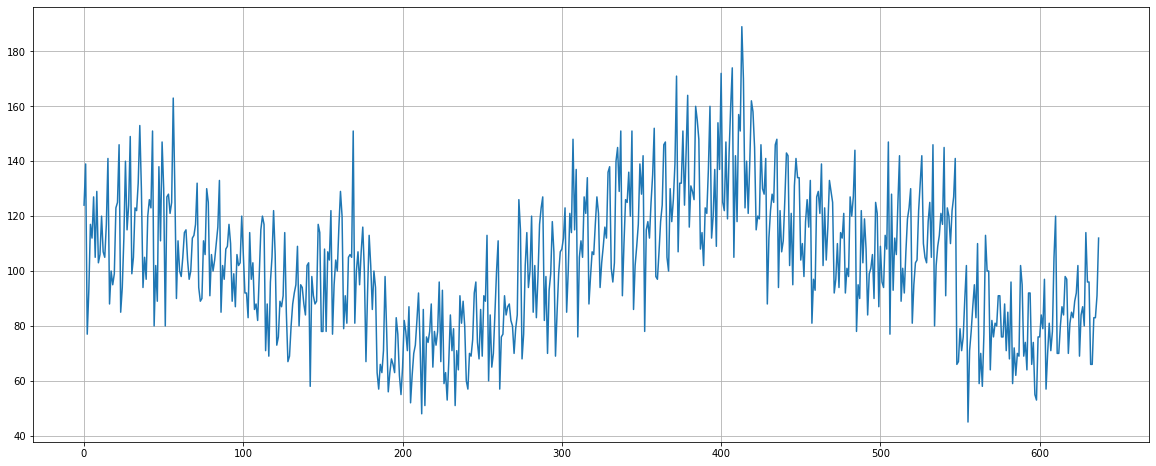

In [5]:
plt.figure(figsize = (20,8))
plt.plot(data['sales'])
plt.grid()
plt.show()

# 2.Í∏∞Î≥∏ Ï†ÑÏ≤òÎ¶¨

## (1) y ÎßåÎì§Í∏∞

* 1Ïùº ÌõÑ ÏàòÏöîÎüâÏùÑ ÏòàÏ∏°ÌïòÎ†§Î©¥, yÎ•º Ïñ¥ÎñªÍ≤å ÎßåÎì§Ïñ¥Ïïº Ìï†ÍπåÏöî?

In [6]:
data['y'] = data['sales'].shift(-1)
display(data.head())
display(data.tail())

date  item  sales  tot_sales  comp_sales      y
0  2013-06-01    28    124       1016          80  139.0
1  2013-06-02    28    139       1019          93   77.0
2  2013-06-03    28     77        676          65   93.0
3  2013-06-04    28     93        764          80  117.0
4  2013-06-05    28    117        818          80  112.0

date  item  sales  tot_sales  comp_sales      y
633  2015-02-24    28     66        603          71   83.0
634  2015-02-25    28     83        622          61   83.0
635  2015-02-26    28     83        611          48   91.0
636  2015-02-27    28     91        696          74  112.0
637  2015-02-28    28    112        774          77    NaN

In [7]:
# Ï†úÏùº ÎßàÏßÄÎßâ ÌñâÏùÄ ÏÇ≠Ï†ú
data.dropna(axis = 0, inplace = True)
data.tail()

date  item  sales  tot_sales  comp_sales      y
632  2015-02-23    28     66        488          43   66.0
633  2015-02-24    28     66        603          71   83.0
634  2015-02-25    28     83        622          61   83.0
635  2015-02-26    28     83        611          48   91.0
636  2015-02-27    28     91        696          74  112.0

## (2) Feature Engineering
* ÌïÑÏöîÌïú Î≥ÄÏàòÎì§ÏùÑ ÎèÑÏ∂úÌï¥ Î¥ÖÏãúÎã§.

## (3) Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†

### 1) x, y ÎÇòÎàÑÍ∏∞

In [9]:
target = 'y'

x = data.drop([target, 'date'], axis = 1) #Ï†úÍ±∞Ìï† Îïå, dateÎèÑ Ï†úÍ±∞
y = data.loc[:, target]

### 2) train, val Î∂ÑÌï†
* 1Ìöå Î∂ÑÌï† : train_test_split( x, y, test_size= , shuffle = False) 
    * test_size : ÏÜåÏàò - ÎπÑÏú®, ÏûêÏó∞Ïàò - Í∞ØÏàò
    * shuffle = False : ÏÑûÏßÄ ÎßêÍ≥† Îç∞Ïù¥ÌÑ∞ ÎÅùÏóêÏÑú test_size ÎßåÌÅº ÏûêÎ•¥Í∏∞
* k-fold cross validation for Time Seires : TimeSeriesSplit

In [10]:
# Ïó¨Í∏∞ÏÑúÎäî 1Ìöå Î∂ÑÌï†Î°ú ÏßÑÌñâÌï©ÎãàÎã§.
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 30, shuffle = False)

# 3.Î™®Îç∏ÎßÅ1 : ARIMA

## (1) y Í∞í ÏÇ¥Ìé¥Î≥¥Í∏∞

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.00746
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.54662
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


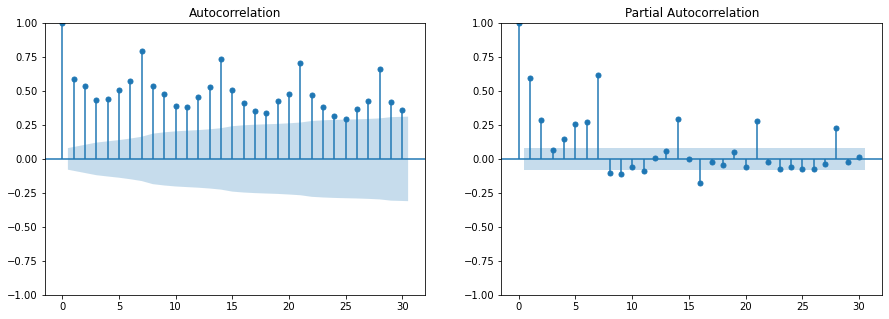

In [11]:
residual_diag(y_train, lags = 30)

## (2) Î™®Îç∏ÎßÅ : Ï¥àÍ∏∞Î™®Îç∏

* p, d, q Í∞íÏùÑ Ïñ¥ÎñªÍ≤å Ï†ïÌï¥Ïïº Ìï†ÍπåÏöî?
* ARÏùò p Ï∞®ÏàòÏôÄ MA q Ï∞®Ïàò Î™®Îëê Í∞íÏù¥ ÌïÑÏöîÌï¥ Î≥¥ÏûÖÎãàÎã§. ÏùºÎã® 1, 1ÏùÑ ÏßÄÏ†ïÌï©ÏãúÎã§.

### 1) ÌïôÏäµ

* sm.tsa.SARIMAX(train, order=(p,d,q)).fit()
    * Î™®Îç∏ ÏÑ†Ïñ∏Ïãú trainÏù¥ Ìè¨Ìï®
    * .fit()ÏúºÎ°ú ÌïôÏäµ.

In [14]:
model1 = sm.tsa.SARIMAX(y_train, order=(1,0,1)).fit()
model2 = sm.tsa.SARIMAX(y_train, order=(1,1,1)).fit()

### 2) ÌèâÍ∞Ä

#### ‚ë† ÏûîÏ∞®ÏßÑÎã®

* Î™®Îç∏.resid : ÏûîÏ∞®Î•º ÎΩëÏùÑ Ïàò ÏûàÏäµÎãàÎã§.
* ÏúÑÏóêÏÑú ÎßåÎì† Ìï®Ïàò residual_diag Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏûîÏ∞®ÏßÑÎã®ÏùÑ Ìï¥ Î¥ÖÏãúÎã§.

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.0
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  1e-05
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


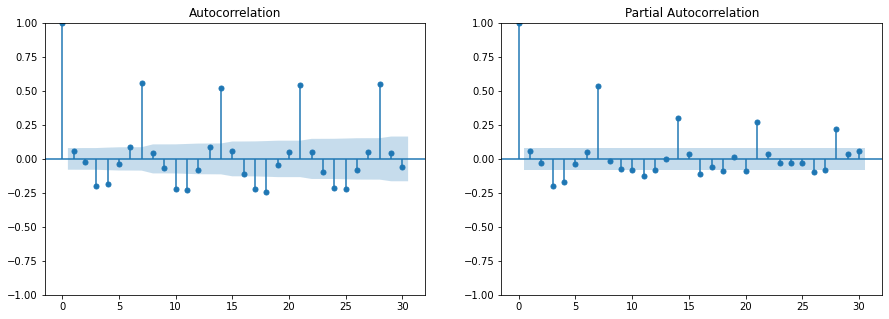

In [15]:
residuals = model1.resid # y_trainÍ≥º ÏòàÏ∏°Í∞í(model1.predict())Í≥ºÏùò Ï∞®Ïù¥
residual_diag(residuals)

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.0
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  1e-05
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


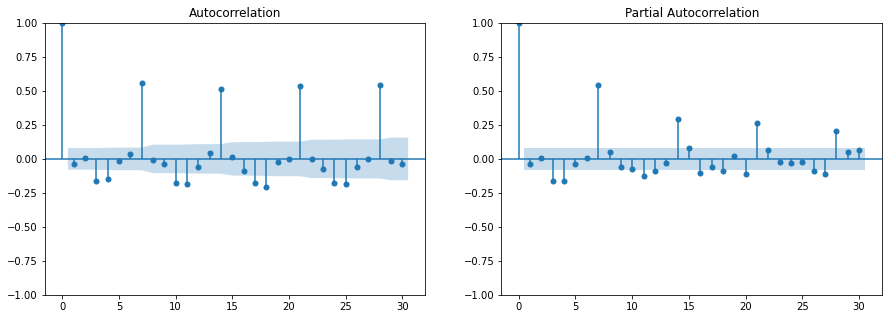

In [16]:
residuals = model2.resid
residual_diag(residuals)

#### ‚ë° AIC
* ÏÑ†Ìòï Î™®Îç∏ÏóêÏÑúÏùò Ï†ÅÌï©ÎèÑÏôÄ, featureÍ∞Ä Í≥ºÎèÑÌïòÍ≤å ÎäòÏñ¥ÎÇòÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌïòÎèÑÎ°ù ÏÑ§Í≥ÑÎêú ÌÜµÍ≥ÑÎüâÏù¥ AIC ÏûÖÎãàÎã§.
* Í∞íÏù¥ ÏûëÏùÑ ÏàòÎ°ù Ï¢ãÏùÄ Î™®Îç∏
* Í≥µÏãù : ùê¥ùêºùê∂=‚àí2 ln‚Å°(ùêø)+2ùëò ‚û° - Î™®Îç∏Ïùò Ï†ÅÌï©ÎèÑ + Î≥ÄÏàòÏùò Í∞ØÏàò
* SARIMAX Î™®Îç∏.aicÎ°ú ÏâΩÍ≤å ÌÜµÍ≥ÑÎüâÏùÑ Íµ¨Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [17]:
print('(1,0,1) aic :  ', model1.aic)
print('(1,1,1) aic :  ', model2.aic)

(1,0,1) aic :   5246.4888643518025
(1,1,1) aic :   5226.970492639293


#### ‚ë¢ Validation

ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î°ú Ïã§Ï†úÍ∞íÍ≥º ÏòàÏ∏°Í∞íÏóê ÎåÄÌï¥ ÎπÑÍµêÌïòÏó¨ Í∑∏ÎûòÌîÑÎ•º Í∑∏Î†§Î¥ÖÏãúÎã§.

In [18]:
pred1 = model1.forecast(30)
print('MAE :', mean_absolute_error(y_val, pred1))
print('MAPE:', mean_absolute_percentage_error(y_val, pred1))

MAE : 15.265834630654918
MAPE: 0.1613604162570821


In [19]:
pred2 = model2.forecast(30)
print('MAE :', mean_absolute_error(y_val, pred2))
print('MAPE:', mean_absolute_percentage_error(y_val, pred2))

MAE : 14.898867117965457
MAPE: 0.15780557366756331


* Í≤∞Í≥º ÏãúÍ∞ÅÌôî

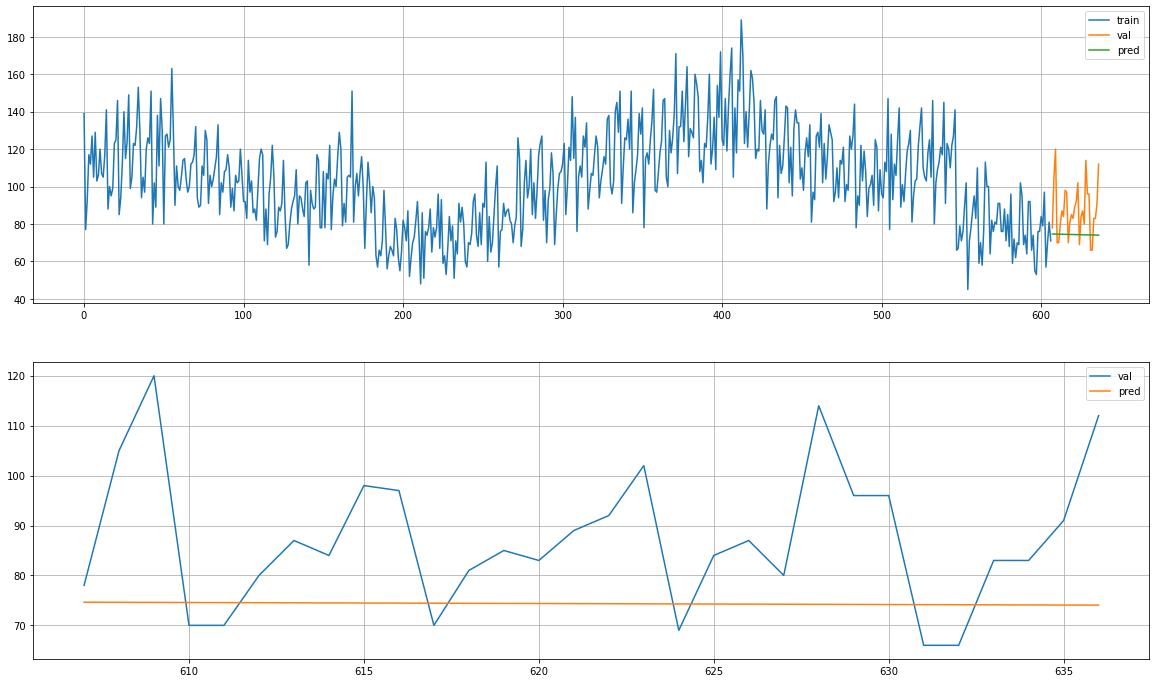

In [20]:
plot_model_result(y_train, y_val, pred1)

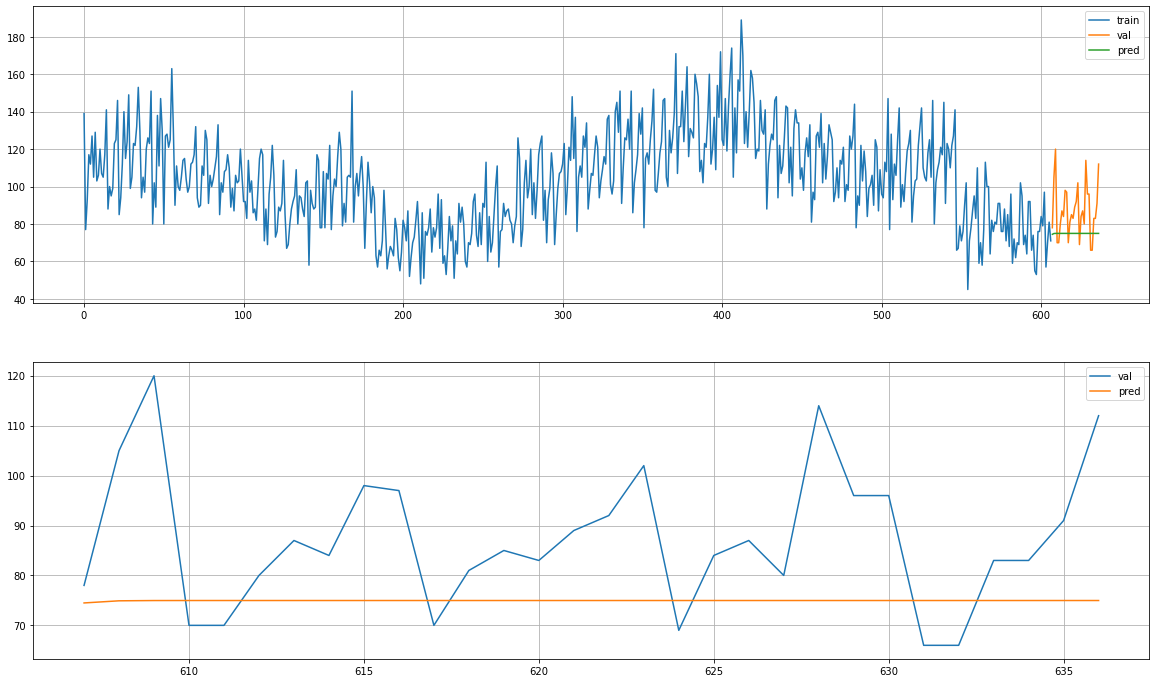

In [21]:
plot_model_result(y_train, y_val, pred2)

## (3) ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù

Ïã§Ï†úÎ°ú p, d, qÎ•º Ï∞æÎäî Í≥ºÏ†ïÏùÄ ÎßàÏπò Grid Search Ï≤òÎüº Í∞íÏùÑ Ï°∞Í∏àÏî© Ï°∞Ï†ïÌï¥Í∞ÄÎ©∞  ÏµúÏ†ÅÏùò Î™®Îç∏ÏùÑ Ï∞æÏïÑÍ∞ÄÎäî Í≥ºÏ†ïÍ≥º Ïú†ÏÇ¨Ìï©ÎãàÎã§.


### 1) ÌïôÏäµ

In [22]:
from itertools import product

* Í∞íÏùò Î≤îÏúÑ ÏßÄÏ†ï
    * ÏãúÍ∞ÑÏù¥ ÎßéÏù¥ ÏÜåÏöîÎê† Ïàò ÏûàÏúºÎãà Î≤îÏúÑÎ•º Ï†ÅÏ†àÌïòÍ≤å ÏßÄÏ†ïÌïòÏÑ∏Ïöî.

In [23]:
# product Ìï®ÏàòÎ•º Ïù¥Ïö©ÌïòÏó¨ Í∞íÏùò Ï°∞Ìï©ÏùÑ Íµ¨ÏÑ±
p = list(range(1,6))
q = list(range(1,6))
d = [1,2]
iter = list(product(p,d,q))
iter

[(1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 2, 5),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 2, 1),
 (3, 2, 2),
 (3, 2, 3),
 (3, 2, 4),
 (3, 2, 5),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 2, 1),
 (4, 2, 2),
 (4, 2, 3),
 (4, 2, 4),
 (4, 2, 5),
 (5, 1, 1),
 (5, 1, 2),
 (5, 1, 3),
 (5, 1, 4),
 (5, 1, 5),
 (5, 2, 1),
 (5, 2, 2),
 (5, 2, 3),
 (5, 2, 4),
 (5, 2, 5)]

* ÌäúÎãù

In [24]:
# 
mae, aic = [],[]
for i in iter :
    model_fit = sm.tsa.SARIMAX(y_train, order=(i[0],i[1],i[2])).fit()
    pred = model_fit.forecast(30)
    mae.append( mean_absolute_error(y_val, pred))
    aic.append(model_fit.aic)
    print(i)

(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 1, 4)
(1, 1, 5)
(1, 2, 1)
(1, 2, 2)
(1, 2, 3)
(1, 2, 4)
(1, 2, 5)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(2, 1, 4)
(2, 1, 5)
(2, 2, 1)
(2, 2, 2)
(2, 2, 3)
(2, 2, 4)
(2, 2, 5)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)
(3, 1, 4)
(3, 1, 5)
(3, 2, 1)
(3, 2, 2)
(3, 2, 3)
(3, 2, 4)
(3, 2, 5)
(4, 1, 1)
(4, 1, 2)
(4, 1, 3)
(4, 1, 4)
(4, 1, 5)
(4, 2, 1)
(4, 2, 2)
(4, 2, 3)
(4, 2, 4)
(4, 2, 5)
(5, 1, 1)
(5, 1, 2)
(5, 1, 3)
(5, 1, 4)
(5, 1, 5)
(5, 2, 1)
(5, 2, 2)
(5, 2, 3)
(5, 2, 4)
(5, 2, 5)


In [25]:
result = pd.DataFrame({'params(p,d,q)' : iter, 'mae' : mae, 'aic':aic})

display(result.loc[result['mae'] == result.mae.min()])
display(result.loc[result['aic'] == result.aic.min()])

params(p,d,q)        mae          aic
41     (5, 1, 2)  10.486904  4984.713653

params(p,d,q)        mae          aic
34     (4, 1, 5)  11.748057  4930.651495

In [26]:
result

params(p,d,q)        mae          aic
0      (1, 1, 1)  14.898867  5226.970493
1      (1, 1, 2)  14.937143  5223.401599
2      (1, 1, 3)  14.825890  5224.920910
3      (1, 1, 4)  15.387541  5189.504549
4      (1, 1, 5)  15.387584  5191.501507
5      (1, 2, 1)  16.178622  5389.156974
6      (1, 2, 2)  20.779535  5229.852247
7      (1, 2, 3)  19.895194  5226.848783
8      (1, 2, 4)  20.490571  5226.105617
9      (1, 2, 5)  21.453392  5221.828721
10     (2, 1, 1)  14.917897  5228.887557
11     (2, 1, 2)  14.859676  5229.805381
12     (2, 1, 3)  15.182340  5192.078835
13     (2, 1, 4)  15.387821  5191.490760
14     (2, 1, 5)  14.126520  5124.435243
15     (2, 2, 1)  16.197713  5375.403314
16     (2, 2, 2)  15.324857  5370.840517
17     (2, 2, 3)  19.060411  5328.701955
18     (2, 2, 4)  20.767069  5209.058268
19     (2, 2, 5)  16.335746  5120.898941
20     (3, 1, 1)  15.095383  5198.275214
21     (3, 1, 2)  12.946231  5143.100093
22     (3, 1, 3)  11.538329  4998.936856
23     (3, 1, 4)  11.328689  5023.548798
24     (3, 1, 5)  11.353649  5006.006335
25     (3, 2, 1)  17.431789  5347.578613
26     (3, 2, 2)  15.830730  5368.221207
27     (3, 2, 3)  16.397560  5291.338210
28     (3, 2, 4)  18.663526  5341.311974
29     (3, 2, 5)  16.302785  5207.694215
30     (4, 1, 1)  14.530553  5164.806791
31     (4, 1, 2)  14.786336  5161.215532
32     (4, 1, 3)  13.648999  5088.618635
33     (4, 1, 4)  11.219530  4981.935670
34     (4, 1, 5)  11.748057  4930.651495
35     (4, 2, 1)  16.335825  5295.114487
36     (4, 2, 2)  16.461186  5295.626945
37     (4, 2, 3)  17.766613  5258.690915
38     (4, 2, 4)  19.579904  5110.934510
39     (4, 2, 5)  18.151136  5206.554223
40     (5, 1, 1)  13.875833  5133.533830
41     (5, 1, 2)  10.486904  4984.713653
42     (5, 1, 3)  10.787711  5042.045232
43     (5, 1, 4)  10.656782  4963.642539
44     (5, 1, 5)  12.150914  4986.834512
45     (5, 2, 1)  15.403331  5243.538325
46     (5, 2, 2)  14.562393  5137.818720
47     (5, 2, 3)  18.224469  5227.856633
48     (5, 2, 4)  20.467004  5104.834189
49     (5, 2, 5)  17.327641  5182.580689

In [33]:
# Í∞ÄÏû• ÏÑ±Îä•Ïù¥ Ï¢ãÏùÄ p, d, q Í∞íÏúºÎ°ú Î™®Îç∏ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
model3 = sm.tsa.SARIMAX(y_train, order=(5,1,2)).fit()

### 2) ÌèâÍ∞Ä

#### ‚ë† ÏûîÏ∞®ÏßÑÎã®

* residual_diag

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.0
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.0
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


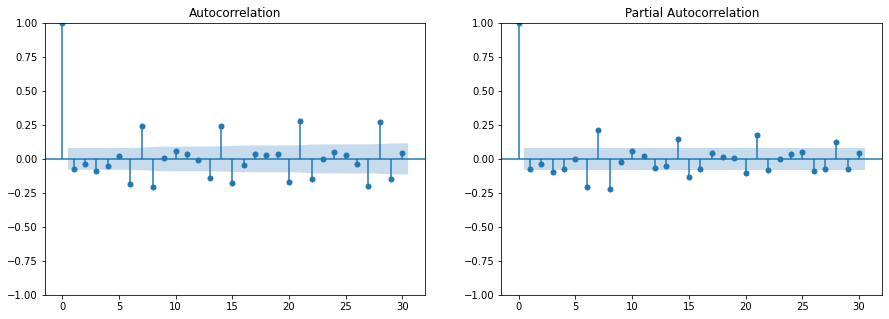

In [34]:
residuals = model3.resid
residual_diag(residuals)

#### ‚ë° AIC
* ÏÑ†Ìòï Î™®Îç∏ÏóêÏÑúÏùò Ï†ÅÌï©ÎèÑÏôÄ, featureÍ∞Ä Í≥ºÎèÑÌïòÍ≤å ÎäòÏñ¥ÎÇòÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌïòÎèÑÎ°ù ÏÑ§Í≥ÑÎêú ÌÜµÍ≥ÑÎüâÏù¥ AIC ÏûÖÎãàÎã§.
* Í∞íÏù¥ ÏûëÏùÑ ÏàòÎ°ù Ï¢ãÏùÄ Î™®Îç∏
* Í≥µÏãù : ùê¥ùêºùê∂=‚àí2 ln‚Å°(ùêø)+2ùëò ‚û° - Î™®Îç∏Ïùò Ï†ÅÌï©ÎèÑ + Î≥ÄÏàòÏùò Í∞ØÏàò

In [35]:
print('(5,1,2) aic : ', model3.aic)

(5,1,2) aic :  4984.713652847422


#### ‚ë¢ Validation

In [36]:
pred3 = model3.forecast(30)
print('MAE :', mean_absolute_error(y_val, pred3))
print('MAPE:', mean_absolute_percentage_error(y_val, pred3))

MAE : 10.486904338488394
MAPE: 0.11286995496696649


* Í≤∞Í≥º ÏãúÍ∞ÅÌôî

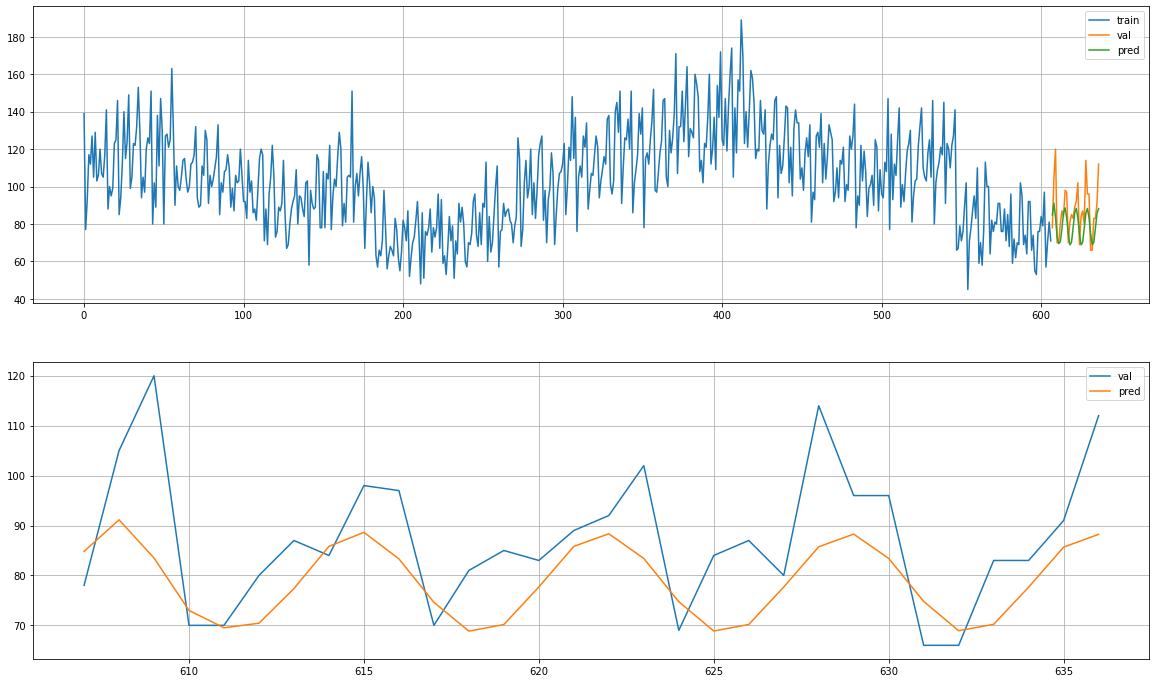

In [37]:
plot_model_result(y_train, y_val, pred3)

# 4.Î™®Îç∏ÎßÅ2 : SARIMA

## (1) Î™®Îç∏ÎßÅ : Ï¥àÍ∏∞Î™®Îç∏

### 1) ÌïôÏäµ

In [38]:
# SARIMA Î™®Îç∏ÎßÅ : P, D, Q, m = 1,1,1,7 Î°ú Î™®Îç∏ÏùÑ ÏÉùÏÑ±Ìï©ÏãúÎã§.
model3_1 = sm.tsa.SARIMAX(y_train, order=(5,1,2), seasonal_order=(1,1,1,7)).fit()

### 2) ÌèâÍ∞Ä

#### ‚ë† ÏûîÏ∞®ÏßÑÎã®

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.0
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.0
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


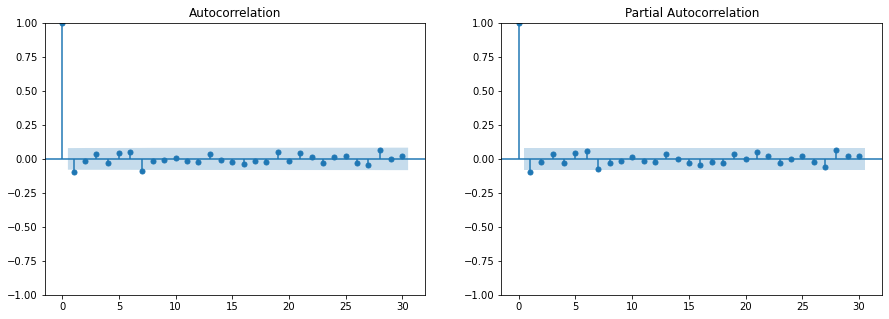

In [39]:
residuals = model3_1.resid
residual_diag(residuals)

#### ‚ë° AIC

In [40]:
model3_1.aic

4678.491587004812

#### ‚ë¢ Validation

In [41]:
pred4 = model3_1.forecast(30)
print('MAE :', mean_absolute_error(y_val, pred4))
print('MAPE:', mean_absolute_percentage_error(y_val, pred4))

MAE : 11.157809384257707
MAPE: 0.12643001580539853


* Í≤∞Í≥º ÏãúÍ∞ÅÌôî

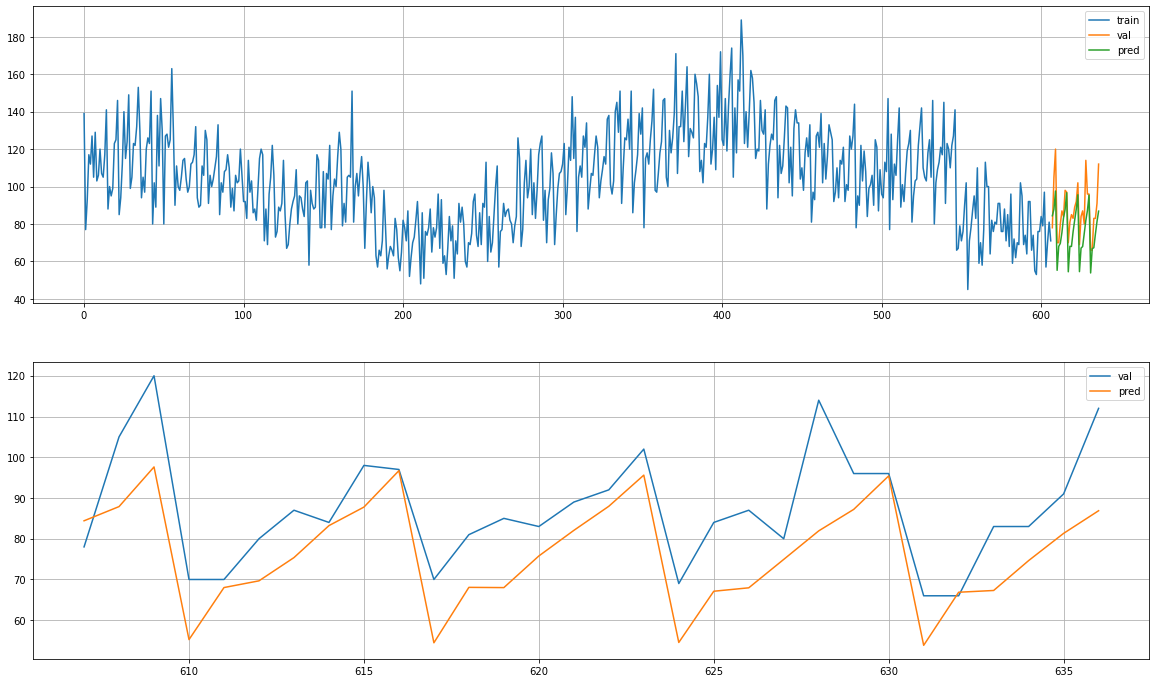

In [42]:
plot_model_result(y_train, y_val, pred4)

## (2) ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
* ÎÑàÎ¨¥ ÌÅ∞ Î≤îÏúÑÎ•º ÏßÄÏ†ïÌïòÎ©¥ ÏãúÍ∞ÑÏù¥ ÎßéÏù¥ Í±∏Î¶ΩÎãàÎã§.
    * DÎäî 1Î°ú Í≥†Ï†ï
    * P, QÎäî 1 ~ 4 ÏÇ¨Ïù¥ÏóêÏÑú Í≤∞Ï†ï

### 1) ÌïôÏäµ

In [43]:
P = list(range(1,5))
Q = list(range(1,5))
D = [1]
mae, aic = [],[]
iter = list(product(P,D,Q))

for i in iter :
    model_fit = sm.tsa.SARIMAX(y_train, order=(5,1,2), seasonal_order=(i[0],i[1],i[2],7)).fit()
    pred = model_fit.forecast(30)
    mae.append( mean_absolute_error(y_val, pred))
    aic.append(model_fit.aic)
    print(i)

(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 1, 4)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(2, 1, 4)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)
(3, 1, 4)
(4, 1, 1)
(4, 1, 2)
(4, 1, 3)
(4, 1, 4)


In [44]:
result = pd.DataFrame({'params(P,D,Q)' : iter, 'mae' : mae, 'aic':aic})

display(result.loc[result['mae'] == result.mae.min()])
display(result.loc[result['aic'] == result.aic.min()])

params(P,D,Q)        mae          aic
14     (4, 1, 3)  10.624408  4685.341906

params(P,D,Q)        mae          aic
0     (1, 1, 1)  11.157809  4678.491587

In [45]:
# Í∞ÄÏû• ÏÑ±Îä•Ïù¥ Ï¢ãÏùÄ P, D, Q Í∞íÏúºÎ°ú Î™®Îç∏ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
model4_1 = sm.tsa.SARIMAX(y_train, order=(5,1,2), seasonal_order=(4,1,3,7)).fit()
model4_2 = sm.tsa.SARIMAX(y_train, order=(5,1,2), seasonal_order=(4,1,1,7)).fit()

### 2) ÌèâÍ∞Ä

#### ‚ë† ÏûîÏ∞®ÏßÑÎã®

* residual_diag

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.0
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.0
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


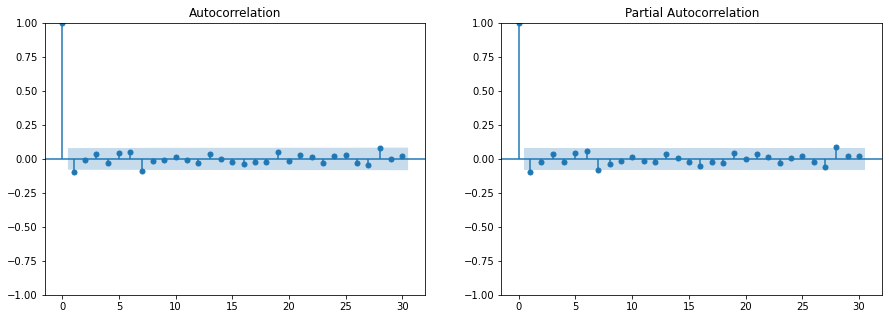

In [46]:
residuals = model4_1.resid
residual_diag(residuals)

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.0
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.0
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


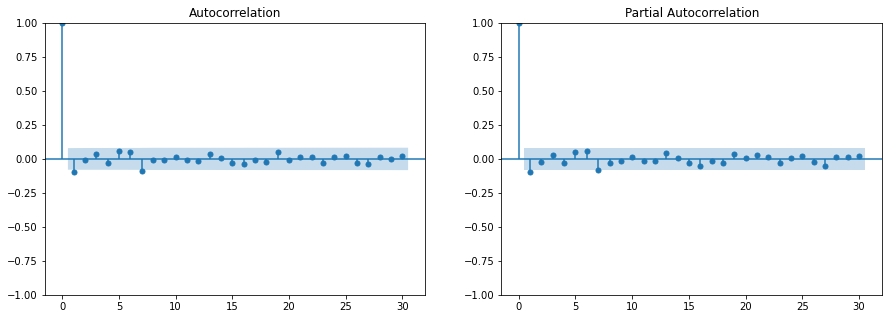

In [47]:
residuals = model4_2.resid
residual_diag(residuals)

#### ‚ë° AIC
* ÏÑ†Ìòï Î™®Îç∏ÏóêÏÑúÏùò Ï†ÅÌï©ÎèÑÏôÄ, featureÍ∞Ä Í≥ºÎèÑÌïòÍ≤å ÎäòÏñ¥ÎÇòÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌïòÎèÑÎ°ù ÏÑ§Í≥ÑÎêú ÌÜµÍ≥ÑÎüâÏù¥ AIC ÏûÖÎãàÎã§.
* Í∞íÏù¥ ÏûëÏùÑ ÏàòÎ°ù Ï¢ãÏùÄ Î™®Îç∏
* Í≥µÏãù : ùê¥ùêºùê∂=‚àí2 ln‚Å°(ùêø)+2ùëò ‚û° - Î™®Îç∏Ïùò Ï†ÅÌï©ÎèÑ + Î≥ÄÏàòÏùò Í∞ØÏàò

In [48]:
model4_1.aic, model4_2.aic

(4685.341906407683, 4680.789827760635)

#### ‚ë¢ Validation

In [49]:
pred5 = model4_2.forecast(30)
print('MAE :', mean_absolute_error(y_val, pred5))
print('MAPE:', mean_absolute_percentage_error(y_val, pred5))

MAE : 11.407403713830876
MAPE: 0.12873342270052762


* Í≤∞Í≥º ÏãúÍ∞ÅÌôî

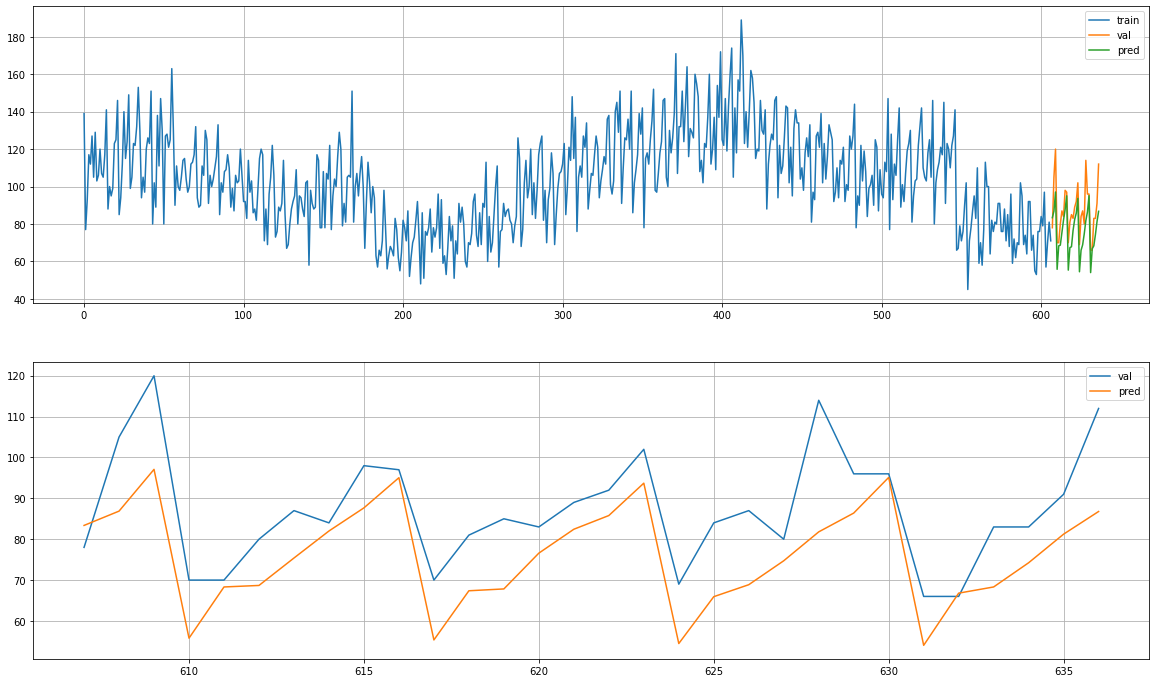

In [50]:
plot_model_result(y_train, y_val, pred5)

# 5.Î™®Îç∏ÎßÅ3 : SARIMAX

## (1) Î™®Îç∏ÎßÅ

### 1) ÌïôÏäµ
* ÏúÑÏóêÏÑú Ï∞æÏùÄ Ï∞®Ïàò(p,d,q, P,D,Q,m) Ïóê x_trainÏùÑ ÎÑ£Ïñ¥ Î™®Îç∏ÎßÅÌï¥ Î¥ÖÏãúÎã§.

In [51]:
m3_1 = sm.tsa.SARIMAX(y_train, order=(5,1,2), seasonal_order=(4,1,3,7), exog=x_train).fit()

### 2) ÌèâÍ∞Ä

#### ‚ë† ÏûîÏ∞®ÏßÑÎã®

* residual_diag

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.0
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.0
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


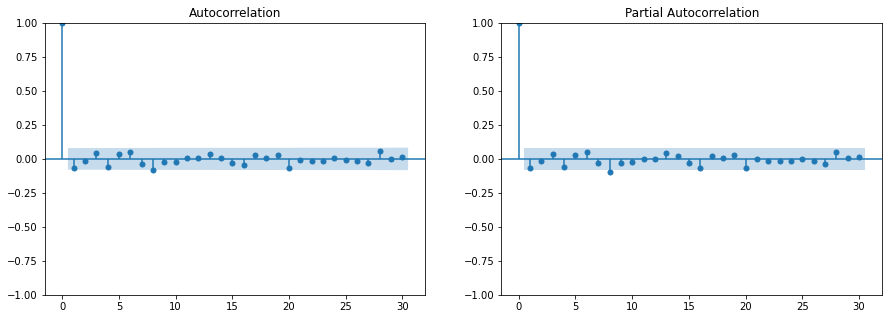

In [52]:
residuals = m3_1.resid
residual_diag(residuals)

#### ‚ë° AIC

In [53]:
print('m3_1 AIC :', m3_1.aic)

m3_1 AIC : 4640.764813785499


#### ‚ë¢ Validation
SARIMAX Î™®Îç∏ÏùÑ ÏÉùÏÑ±ÌïòÍ≥†, ÏòàÏ∏°Ìï† ÎïåÎäî exog=x_val ÏòµÏÖòÏù¥ Îì§Ïñ¥Í∞ÄÏïº Ìï®.

In [54]:
pred = m3_1.forecast(30,  exog=x_val)
print('MAE :', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_percentage_error(y_val, pred))

MAE : 7.898073766980521
MAPE: 0.09005807460803365


* Í≤∞Í≥º ÏãúÍ∞ÅÌôî

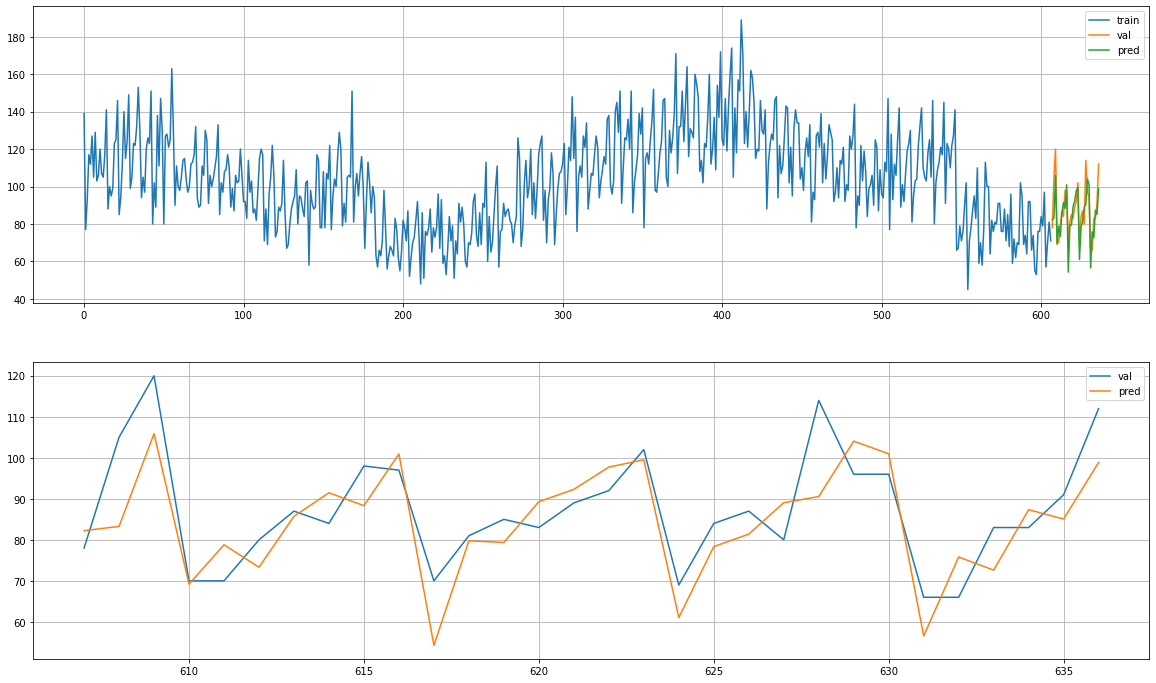

In [55]:
plot_model_result(y_train, y_val, pred)